# Quora Insincere Questions Classification Using Neural Networks and Deep Learning Models
Outline:
1. Dowload data from Kaggle to google Colab

2. Prepare the data for Modeling using the TF-IDF Technique

3. Train a deep learning model using `PyTorch` package

## Download Data from Kaggle

In [1]:
!ls

kaggle.json  sample_data


In [2]:
!pwd

/content


In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

  0% 0.00/54.9M [00:00<?, ?B/s]
100% 54.9M/54.9M [00:00<00:00, 904MB/s]
  0% 0.00/15.8M [00:00<?, ?B/s]
100% 15.8M/15.8M [00:00<00:00, 966MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 657MB/s]


In [6]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [7]:
import pandas as pd

In [9]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sample_fname)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [10]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [11]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [12]:
raw_df.sample(10)

,qid,question_text,target
729184,8ec7aed6a2bb82abb584,"Whilst sleeping, was your dream when overseas ...",0
147751,1ce4bcb46c0bfa996a43,Why are there 2 chlorides in Zn+HCL=Zncl2+H2?,0
724495,8dd873576b2267c9aaae,Why did the Germany lose the battle of Atlantic?,0
1163051,e3e4d26065cd31b52c55,How do I practice answer writing in UPSC exam ...,0
747337,926646dae7da026d7d07,How does the cork act as a protective tissue?,0
714858,8beeed700941e5b81b3c,What is residual resistivity?,0
301154,3af8ff5a6e6b8f3d24e1,What is the future of Nano XRP with now 10% of...,0
845103,a59a71bd00e11de674fa,Why should someone interested in Entrepreneurs...,0
353572,454c1dfc31bba512abe6,How much does an Epic training certification c...,0
1127164,dce3c30fbab7a13eb0f2,What is your review of Rashmirathi (1952 book)?,0


## Data Exploration

In [13]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE)

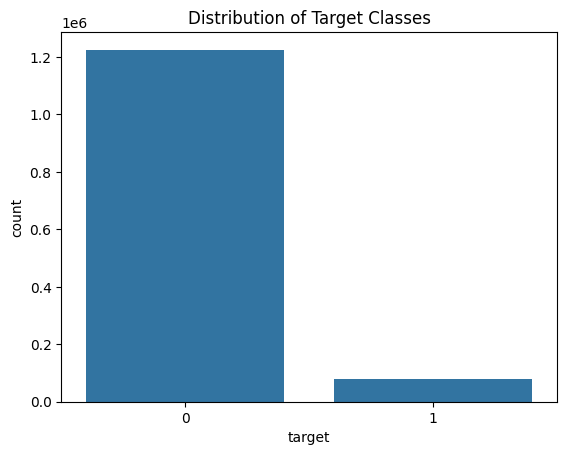

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=raw_df)
plt.title('Distribution of Target Classes')
plt.show()

In [15]:
# Add character count column if not already added
raw_df['char_count'] = raw_df['question_text'].apply(len)

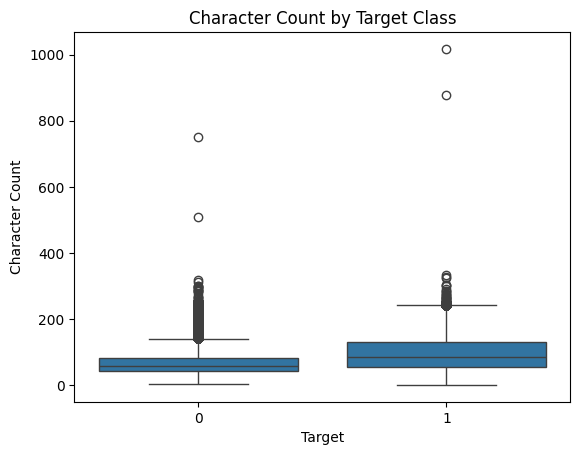

In [16]:
# Box plot of character count by target class
sns.boxplot(x='target', y='char_count', data=raw_df)
plt.title('Character Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Character Count')
plt.show()


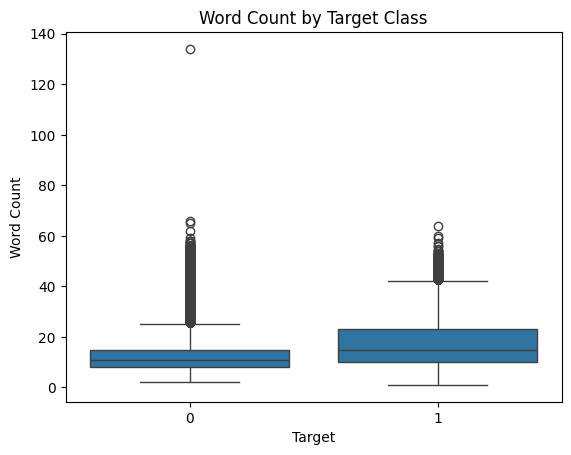

In [ ]:
# Add word count column
raw_df['word_count'] = raw_df['question_text'].apply(lambda x: len(x.split()))

# Box plot of word count
sns.boxplot(x='target', y='word_count', data=raw_df)
plt.title('Word Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()


<ipython-input-17-7b0bff76c295>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  raw_df.word_count = raw_df['question_text'].apply(lambda x: len(x.split()))


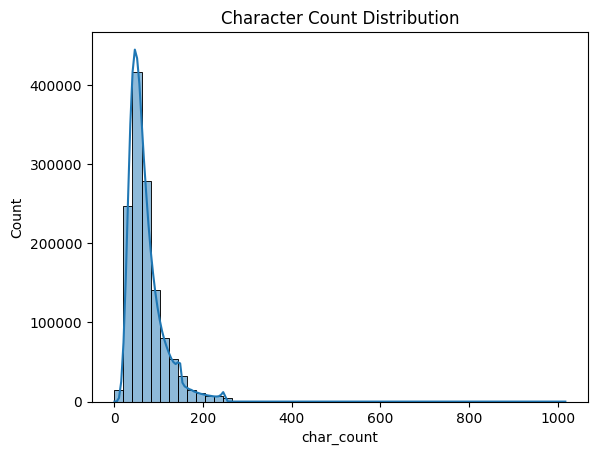

In [17]:
raw_df.char_count = raw_df['question_text'].apply(len)
raw_df.word_count = raw_df['question_text'].apply(lambda x: len(x.split()))

# Plot distributions
sns.histplot(raw_df.char_count, bins=50, kde=True)
plt.title('Character Count Distribution')
plt.show()


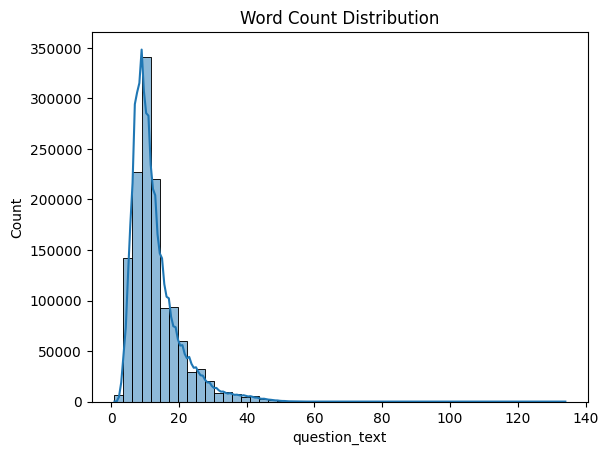

In [18]:
sns.histplot(raw_df.word_count, bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

In [19]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

top_words = get_top_n_words(sample_df['question_text'], n=20)
print(top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('would', 4851), ('best', 4683), ('get', 4636), ('people', 3732), ('like', 3323), ('good', 2826), ('one', 2261), ('make', 2044), ('think', 1933), ('many', 1860), ('someone', 1680), ('much', 1655), ('use', 1468), ('want', 1442), ('way', 1430), ('know', 1399), ('find', 1353), ('take', 1349), ('become', 1315), ('ever', 1283)]


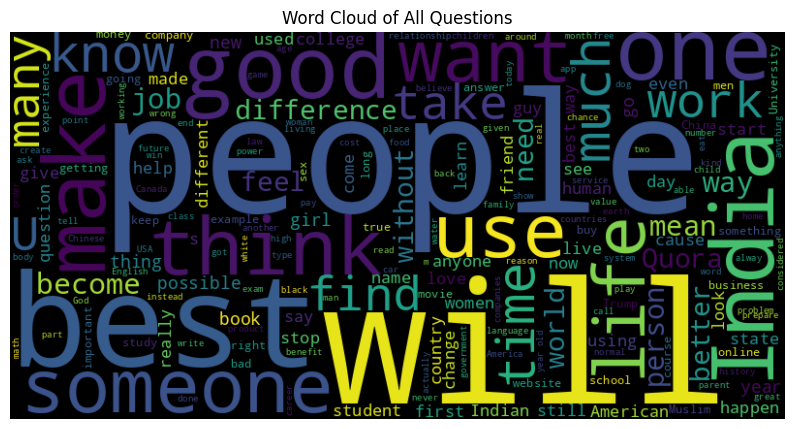

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(sample_df['question_text']))
plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Questions")
plt.show()


In [21]:
raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)
raw_df

<ipython-input-21-d02c7e5e2bf1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)


,qid,question_text,target,char_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77
...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,93
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,91
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,25
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,71


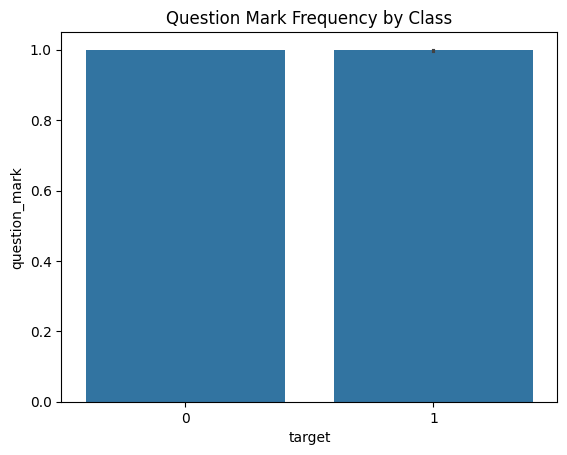

In [22]:
# Presence of question mark
raw_df['question_mark'] = raw_df['question_text'].apply(lambda x: '?' in x)

sns.barplot(x='target', y='question_mark', data=raw_df)
plt.title('Question Mark Frequency by Class')
plt.show()


In [27]:
sample_df

,qid,question_text,target
443058,56d3b0dc340bcbe05331,What are the industrial uses of ethene?,0
1190642,e9559ab3ab7be5b1e171,Why do I keep getting urges to kill my family?,1
690910,875293c0e31a91dcf71d,Why are men unofficially banned from being chi...,0
1060846,cfdcbe33973bf2986da0,Filipinas have such beautiful skin. Why do the...,0
1283513,fb8b7d032347abb9b32c,What power does internet have?,0
...,...,...,...
896958,afbdaa2322c2348bf244,"Will winds, centrifugal forces, and seismic ac...",0
888068,adfdf0c7e7a85ebd4886,What do you mean by linear and square law modu...,0
1020439,c7f766508e5b24b34717,Is it possible for there to be parts of histor...,0
655287,805b28042da51b5f9663,How easy is it for one to justify irrational a...,0


In [23]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93898
1,0.06102


## Prepare the Data for Training
- Convert text to TF-IDF Vectors

- Convert Vectors to PyyTorch tensors

- Create PyTorch Data Loaders

### Convert text to TF-IDF

In [24]:
import nltk

In [25]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [28]:
stemmer = SnowballStemmer(language='english')

In [29]:
stemmer.stem('going')

'go'

In [30]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) ]

In [31]:
tokenize('This is a set of butterfries unexpectedily!')

['this', 'is', 'a', 'set', 'of', 'butterfri', 'unexpectedili', '!']

In [32]:
word_tokenize('This is something very new () in the field of data analysis.')

['This',
 'is',
 'something',
 'very',
 'new',
 '(',
 ')',
 'in',
 'the',
 'field',
 'of',
 'data',
 'analysis',
 '.']

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
english_stopwords = stopwords.words('english')

In [35]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [38]:
sample_df.question_text

,question_text
443058,What are the industrial uses of ethene?
1190642,Why do I keep getting urges to kill my family?
690910,Why are men unofficially banned from being chi...
1060846,Filipinas have such beautiful skin. Why do the...
1283513,What power does internet have?
...,...
896958,"Will winds, centrifugal forces, and seismic ac..."
888068,What do you mean by linear and square law modu...
1020439,Is it possible for there to be parts of histor...
655287,How easy is it for one to justify irrational a...


In [39]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 27.8 s, sys: 90.7 ms, total: 27.9 s
Wall time: 31.4 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7d47fc78e2a0>)

In [40]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', ':', '?', '[', ']', '``', 'abl', 'abroad',
       'abus', 'accept', 'access', 'accomplish', 'accord', 'account',
       'achiev', 'acid', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'air', 'allow',
       'alreadi', 'also', 'altern', 'alway', 'amazon', 'america',
       'american', 'among', 'amount', 'analysi', 'ancient', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anyon', 'anyth', 'app',
       'appear', 'appl', 'appli', 'applic', 'approach', 'arab', 'area',
       'armi', 'around', 'art', 'asian', 'ask', 'associ', 'atheist',
       'attack', 'attend', 'attract', 'australia', 'avail'], dtype=object)

## Transform the questionsin to Vectors

In [41]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 26.5 s, sys: 70.6 ms, total: 26.6 s
Wall time: 27.2 s


In [42]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 548137 stored elements and shape (100000, 1000)>

In [43]:
inputs[0].toarray()[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12619888,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [44]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 40s, sys: 285 ms, total: 1min 40s
Wall time: 1min 43s


In [46]:
test_inputs.shape

(375806, 1000)

## Split the Training and Validation Sets

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
targets = sample_df.target

In [49]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3)

In [50]:
train_inputs.shape

(70000, 1000)

In [51]:
val_inputs.shape

(30000, 1000)

In [52]:
train_targets

,target
1273206,0
653031,0
736603,0
275412,0
1077097,0
...,...
92394,0
395935,0
1096296,0
729700,0


In [ ]:
val_targets

,target
1229863,0
1133920,0
581216,0
1271173,0
369516,0
...,...
667353,0
240245,0
141273,0
642007,0


## Convert to PyTorch Tensors

In [53]:
import torch

In [54]:
#convert from a sparse matrix to numpy array using the command .toarray() and converting to float
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [55]:
train_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [56]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [57]:
val_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [58]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [59]:
# convert from pandas series to numpy array using the command .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [60]:
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()

## Create PyTorch Data Loaders

In [61]:
from torch.utils.data import TensorDataset, DataLoader

In [62]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(train_input_tensors)

In [63]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [64]:
BATCH_SIZE = 128

In [65]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [66]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [67]:
len(train_dl)

547

In [ ]:
# about 547 batches in the data loader

## Train Deep Learning Model

In [79]:
import torch.nn as nn
import torch.nn.functional as F

In [69]:
from sklearn.metrics import accuracy_score, f1_score

In [116]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [117]:
model = QuoraNet()

In [118]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  #convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('batch_targets', bt[:10])

   # check the metrics
  print('Accuracy score', accuracy_score(bt, preds))
  print('F1 score', f1_score(bt, preds))

  # Loss
  print('Loss', F.binary_cross_entropy(preds.float(), bt))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.5134, 0.5131, 0.5131, 0.5137, 0.5138, 0.5132, 0.5134, 0.5135, 0.5132,
        0.5133], grad_fn=<SliceBackward0>)
preds tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
batch_targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Accuracy score 0.0546875
F1 score 0.1037037037037037
Loss tensor(94.5312)


In [104]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [105]:
bi.shape

torch.Size([128, 1000])

In [106]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
bt.shape

torch.Size([128])

In [107]:
bo[:10]

tensor([[-0.0137],
        [-0.0119],
        [-0.0129],
        [-0.0144],
        [-0.0115],
        [-0.0117],
        [-0.0121],
        [-0.0112],
        [-0.0113],
        [-0.0104]], grad_fn=<SliceBackward0>)

In [123]:
bo.shape

torch.Size([128, 1])

In [134]:
# Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [], [], []

  # loop over batches
  for batch in dl:

    # Get inputs and targets
    inputs, targets = batch

    # Get outputs from the model
    outputs = model(inputs)

    # convert to probabilities
    probs = torch.sigmoid(outputs[:,0])

    # compute loss
    loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

    # compute preds
    preds = (probs > 0.5).int()

    # compute accuracy and F1 scores
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

  return (torch.mean(torch.tensor(losses)).item(),
  torch.mean(torch.tensor(accs)).item(),
  torch.mean(torch.tensor(f1s)).item())


In [135]:
evaluate(model, train_dl)

(0.2975679039955139, 0.995013415813446, 0.9547547698020935)

In [136]:
evaluate(model, val_dl)

(8.351070404052734, 0.9370123744010925, 0.40193670988082886)

In [142]:
from operator import le
# Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)

  for epoch in range(epochs):
    # Training phase of the model
    for batch in train_dl:

      # Get inputs and targets
      inputs, targets = batch

      # Get model outputs
      outputs = model(inputs)

      # Get probabilities
      probs = torch.sigmoid(outputs[:,0])

      # Compute loss
      loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

      # Perform optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Evaluation phase of the model
    loss, acc, f1 = evaluate(model, val_dl)
    print('Epoch: {}, Loss {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}'.format(
        epoch+1, loss, acc, f1))
    history.append([loss, acc, f1])
  return history






In [133]:
fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 0.2146, Accuracy: 0.9382, F1 Score: 0.4347
Epoch: 2, Loss 0.2896, Accuracy: 0.9382, F1 Score: 0.4111
Epoch: 3, Loss 0.3284, Accuracy: 0.9371, F1 Score: 0.4091
Epoch: 4, Loss 0.3719, Accuracy: 0.9396, F1 Score: 0.3700
Epoch: 5, Loss 0.3775, Accuracy: 0.9363, F1 Score: 0.4195
Epoch: 6, Loss 0.3801, Accuracy: 0.9367, F1 Score: 0.3921
Epoch: 7, Loss 0.3826, Accuracy: 0.9378, F1 Score: 0.4070
Epoch: 8, Loss 0.4343, Accuracy: 0.9376, F1 Score: 0.3859
Epoch: 9, Loss 0.4245, Accuracy: 0.9364, F1 Score: 0.3897
Epoch: 10, Loss 0.4176, Accuracy: 0.9370, F1 Score: 0.4019


In [138]:
model = QuoraNet()

In [139]:
history = []

In [140]:
history.append(evaluate(model, val_dl))

In [141]:
history

[(13.473825454711914, 0.9387633204460144, 0.0)]

In [143]:
history+=fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.0252, Accuracy: 0.9457, F1 Score: 0.3701
Epoch: 2, Loss 2.9656, Accuracy: 0.9471, F1 Score: 0.4201
Epoch: 3, Loss 3.0927, Accuracy: 0.9463, F1 Score: 0.3478
Epoch: 4, Loss 3.7086, Accuracy: 0.9463, F1 Score: 0.4037
Epoch: 5, Loss 5.0842, Accuracy: 0.9435, F1 Score: 0.3895


In [144]:
history+=fit(10, 0.0001, model, train_dl, val_dl)

Epoch: 1, Loss 6.0363, Accuracy: 0.9420, F1 Score: 0.4062
Epoch: 2, Loss 6.5113, Accuracy: 0.9419, F1 Score: 0.4053
Epoch: 3, Loss 6.9862, Accuracy: 0.9420, F1 Score: 0.3975
Epoch: 4, Loss 7.3477, Accuracy: 0.9421, F1 Score: 0.3953
Epoch: 5, Loss 7.7240, Accuracy: 0.9423, F1 Score: 0.3797
Epoch: 6, Loss 7.9197, Accuracy: 0.9412, F1 Score: 0.3875
Epoch: 7, Loss 8.2569, Accuracy: 0.9413, F1 Score: 0.3911
Epoch: 8, Loss 8.5119, Accuracy: 0.9420, F1 Score: 0.3781
Epoch: 9, Loss 8.7324, Accuracy: 0.9420, F1 Score: 0.3843
Epoch: 10, Loss 8.8256, Accuracy: 0.9409, F1 Score: 0.3919


In [146]:
history

[(13.473825454711914, 0.9387633204460144, 0.0),
 [3.0252416133880615, 0.9456671476364136, 0.3701147139072418],
 [2.965629816055298, 0.9470522403717041, 0.42012232542037964],
 [3.0926709175109863, 0.9463320374488831, 0.34783998131752014],
 [3.708585739135742, 0.9462987780570984, 0.40374958515167236],
 [5.084163665771484, 0.9434950947761536, 0.38949960470199585],
 [6.036300182342529, 0.9419880509376526, 0.4061948359012604],
 [6.511275768280029, 0.9418882727622986, 0.40533801913261414],
 [6.986212253570557, 0.9419547915458679, 0.39747706055641174],
 [7.347668170928955, 0.9421210289001465, 0.3952793776988983],
 [7.724043846130371, 0.9422872066497803, 0.3796953558921814],
 [7.91966438293457, 0.9411901831626892, 0.3875090777873993],
 [8.256855964660645, 0.9413231611251831, 0.39114344120025635],
 [8.511913299560547, 0.9419547915458679, 0.37807393074035645],
 [8.73243236541748, 0.9419880509376526, 0.38430073857307434],
 [8.825644493103027, 0.9409019947052002, 0.39194631576538086]]

In [145]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [147]:
import matplotlib.pyplot as plt

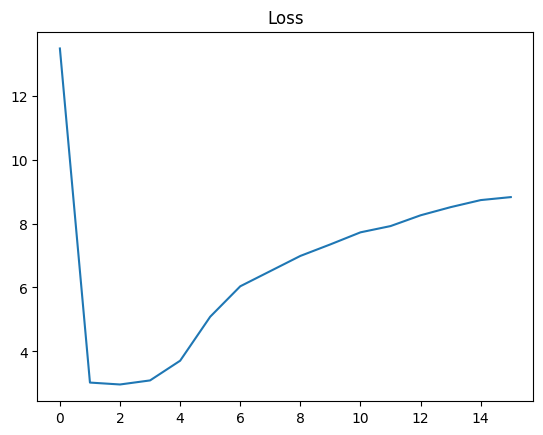

In [148]:
plt.title('Loss')
plt.plot(losses)

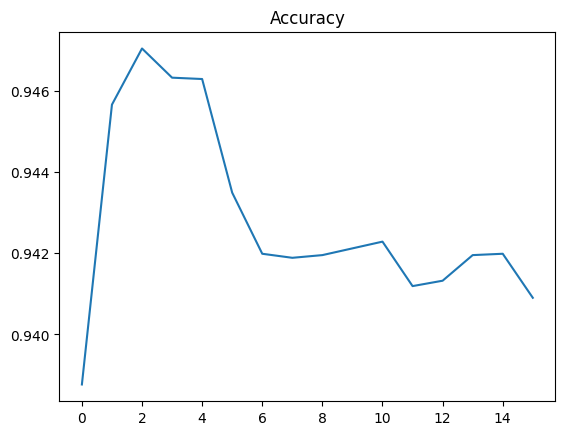

In [149]:
plt.title('Accuracy')
plt.plot(accs)

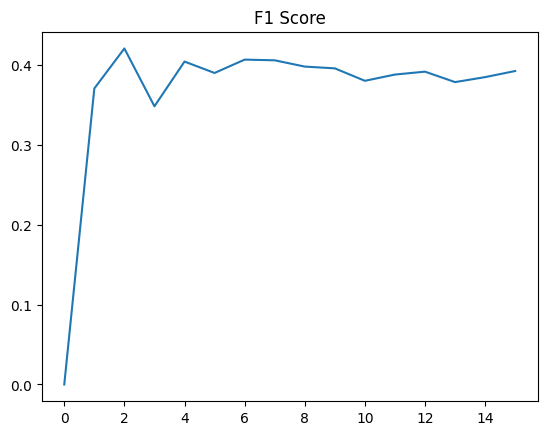

In [150]:
plt.title('F1 Score')
plt.plot(f1s)

## Make Predictions on Example Data

In [231]:
small_df = raw_df.sample(10)

In [232]:
small_df

,qid,question_text,target,char_count,question_mark
887846,adf20ccb5e5f4efd6a9b,What is transactional analysis most commonly u...,0,54,True
1150021,e15290b93513b3e9a1e1,What type of poetry is this?,0,28,True
850130,a690aa49a2ae03f8f682,Should we monitor white males for potential sh...,1,53,True
658998,8114a54cc75327b8d1a8,How do I stop being such a toxic and vitriolic...,0,111,True
337969,42359d5240f8dc6eaa44,What are some practical ways of saving money?,0,45,True
318208,3e5d2e0b9ddc78bc2dfb,"How do you say ""Merry Christmas, you beautiful...",0,67,True
831768,a2fe6cab57486cf500a1,Could Danzo defeat Shin Uchiha? Why or why not?,0,47,True
1076759,d302d21455dac0181c37,Will artificial intelligence be more humane th...,0,56,True
648739,7f0de36e19501fc28c71,What are the cliché words?,0,26,True
89684,119338b8c137348a44fe,Why did Resident Evil 7 sell less than 6?,1,41,True


In [233]:
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [234]:
# predictions
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [235]:
# actual values
small_df.target.values

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [205]:
small_df.question_text.values

array(['Is Donald Trump addicted to Twitter?',
       'Is Catalonia a nice country to visit?',
       'Which course should I persue IPVAD (International program in visual arts & design) or ADVFX plus (Advanced program in VFX)?',
       "What aspect/trait of your country's culture could be beneficial for other countries?",
       'What are the chances of pqwl 23/wl 7 ticket in jnaneshwari exp getting confirmed?',
       'Stock market Traders: What does your office desk/workstation look like?',
       'How would droids from the Droid army become renegades?',
       'Is Indian political narrative becoming Orwellian, with BJP calling itself secular, calling Hinduism (a religion in all practical sense) secular?',
       'How bad can Brexiteers\' reassurance get, after we\'ve gone from "It\'ll be great" to "It won\'t be a Mad Max dystopia"? By 2019: "Only one in 10 of you will be made into Soylent Green", perhaps?',
       'How are stars reflected in water?'], dtype=object)

In [175]:
small_df.question_text[:10]

,question_text
213090,What is a great name for a non profit focusing...
1019184,Is transgenderism indicative of the end stage ...
1238177,What are the benefits of speaking Portuguese?
68630,"What is a good English dubbed anime movie, tha..."
206800,Why don't white people see all the privilege t...
458683,How do I crack my 12th board exams when I am p...
1254088,I'm bored with my repertoire. What is a favori...
323380,Has anyone received any bad grades in freshman...
74684,Why do I keep thinking I have BPD? Do I act an...
665300,How do I convince my mom that everything will ...


In [177]:
small_df.iloc[9]["question_text"]


'How do I convince my mom that everything will be okay?'

In [178]:
small_df.iloc[4]["question_text"]

"Why don't white people see all the privilege they have when they are the majority of people killed in mass shootings? What bigger privilege is there in the USA?"

In [179]:
small_df.iloc[1]["question_text"]

'Is transgenderism indicative of the end stage of a society?'

In [206]:
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [207]:
predict_text('what is the function of a plasma cell?')

tensor([0], dtype=torch.int32)

In [208]:
predict_text('why cant liberals realize that they are stupid??')

tensor([1], dtype=torch.int32)

In [ ]:
predict_text('')

In [209]:
predict_text('How does photosynthesis work in plants?')

tensor([0], dtype=torch.int32)

In [210]:
predict_text('Is the moon landing actually fake?')

tensor([0], dtype=torch.int32)

In [211]:
predict_text('When will people stop being so dumb about climate change?')

tensor([0], dtype=torch.int32)

In [213]:
predict_text('Why is the government hiding the truth about aliens?')

tensor([0], dtype=torch.int32)

In [243]:
predict_text('Why do conservatives always ignore facts?')

tensor([1], dtype=torch.int32)

In [215]:
predict_text('Is it possible for flat-earthers to ever use common sense?')

tensor([0], dtype=torch.int32)

In [245]:
predict_text("Why do idiots still believe in climate change?")

tensor([0], dtype=torch.int32)

In [246]:
predict_text('why cant people from west realize that they are selfish??')

tensor([0], dtype=torch.int32)

## Generate Predictions for the Test Set